In [1]:
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid')


In [2]:
df = pd.read_csv('eplmatches.csv')

In [3]:
df.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A


In [4]:
df.isnull().sum()

Season_End_Year    0
Wk                 0
Date               0
Home               0
HomeGoals          0
AwayGoals          0
Away               0
FTR                0
dtype: int64

In [5]:
df.dtypes

Season_End_Year     int64
Wk                  int64
Date               object
Home               object
HomeGoals           int64
AwayGoals           int64
Away               object
FTR                object
dtype: object

In [6]:
df.describe()

,Season_End_Year,Wk,HomeGoals,AwayGoals
count,11646.000000,11646.000000,11646.000000,11646.000000
mean,2007.214838,19.738022,1.520780,1.140048
std,8.781986,11.128955,1.302456,1.132243
min,1993.000000,1.000000,0.000000,0.000000
25%,2000.000000,10.000000,1.000000,0.000000
50%,2007.000000,20.000000,1.000000,1.000000
75%,2015.000000,29.000000,2.000000,2.000000
max,2022.000000,42.000000,9.000000,9.000000


In [7]:
df = df.drop(columns='Wk')

In [8]:
df.head(20)

,Season_End_Year,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1992-08-15,Arsenal,2,4,Norwich City,A
5,1993,1992-08-15,Ipswich Town,1,1,Aston Villa,D
6,1993,1992-08-15,Everton,1,1,Sheffield Weds,D
7,1993,1992-08-15,Southampton,0,0,Tottenham,D
8,1993,1992-08-15,Chelsea,1,1,Oldham Athletic,D
9,1993,1992-08-16,Nott'ham Forest,1,0,Liverpool,H


In [9]:
df.Home.nunique()

50

In [10]:
df.Away.nunique()

50

In [11]:
df.groupby('Season_End_Year', as_index=False) \
    .agg({'Home':'nunique'}) \
    .rename(columns={'Home':'Team_number'})

,Season_End_Year,Team_number
0,1993,22
1,1994,22
2,1995,22
3,1996,20
4,1997,20
5,1998,20
6,1999,20
7,2000,20
8,2001,20
9,2002,20


In [12]:
df['TotalGoals'] = df['HomeGoals'] + df['AwayGoals']

In [13]:
df.head()

,Season_End_Year,Date,Home,HomeGoals,AwayGoals,Away,FTR,TotalGoals
0,1993,1992-08-15,Coventry City,2,1,Middlesbrough,H,3
1,1993,1992-08-15,Leeds United,2,1,Wimbledon,H,3
2,1993,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,3
3,1993,1992-08-15,Crystal Palace,3,3,Blackburn,D,6
4,1993,1992-08-15,Arsenal,2,4,Norwich City,A,6


In [14]:
goals_per_season = df.groupby('Season_End_Year',as_index=False) \
    .agg({'TotalGoals':'sum'}) 

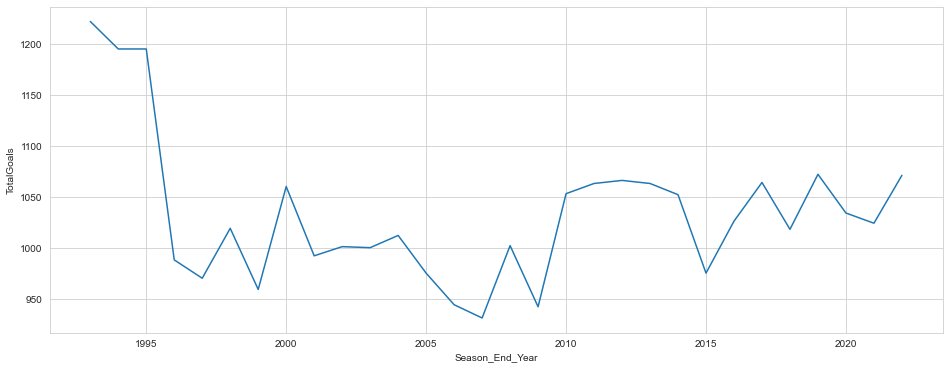

In [15]:
plt.figure(figsize=(16,6))
ax= sns.lineplot(data=goals_per_season, x="Season_End_Year", y='TotalGoals')
ax.yaxis.grid(True)

In [16]:
avg_goals = df.groupby('Season_End_Year',as_index=False) \
    .agg({'TotalGoals':'mean'})

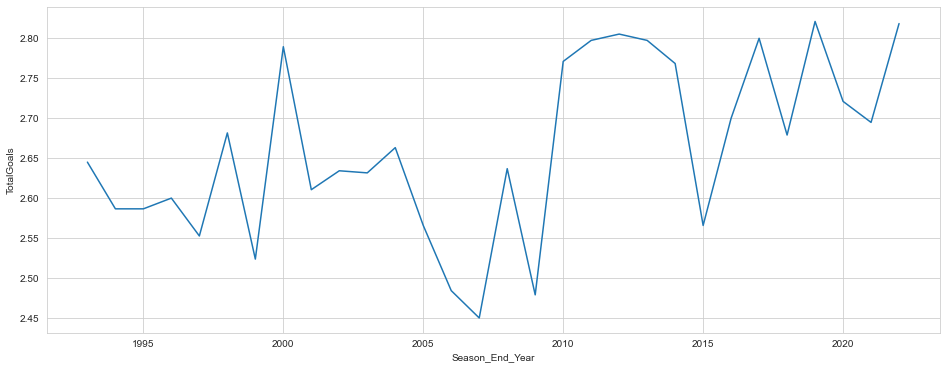

In [17]:
plt.figure(figsize=(16,6))
ax= sns.lineplot(data=avg_goals, x="Season_End_Year", y='TotalGoals')
ax.yaxis.grid(True)

In [18]:
df.head()

,Season_End_Year,Date,Home,HomeGoals,AwayGoals,Away,FTR,TotalGoals
0,1993,1992-08-15,Coventry City,2,1,Middlesbrough,H,3
1,1993,1992-08-15,Leeds United,2,1,Wimbledon,H,3
2,1993,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,3
3,1993,1992-08-15,Crystal Palace,3,3,Blackburn,D,6
4,1993,1992-08-15,Arsenal,2,4,Norwich City,A,6


In [19]:
w_home = df.query('FTR == "H"') \
    .groupby('Home',as_index=False) \
    .agg({'FTR':'count'}) \
    .sort_values('FTR',ascending=False)

In [20]:
w_away = df.query('FTR == "A"') \
    .groupby('Away',as_index=False) \
    .agg({'FTR':'count'}) \
    .sort_values('FTR',ascending=False)

In [21]:
wins = w_home.merge(w_away, left_on='Home', right_on='Away', how='outer')

In [22]:
wins['wins'] = wins['FTR_x'] + wins['FTR_y']
wins = wins.drop(columns=['Away', 'FTR_x', 'FTR_y'])

In [23]:
d_home = df.query('FTR == "D"') \
    .groupby('Home',as_index=False) \
    .agg({'FTR':'count'}) \
    .sort_values('FTR',ascending=False)

In [24]:
d_away = df.query('FTR == "D"') \
    .groupby('Away',as_index=False) \
    .agg({'FTR':'count'}) \
    .sort_values('FTR',ascending=False)

In [25]:
draws = d_home.merge(d_away, left_on='Home', right_on='Away', how='outer')

In [26]:
draws['draws'] = draws['FTR_x'] + draws['FTR_y']
draws = draws.drop(columns=['Away', 'FTR_x', 'FTR_y'])

In [27]:
team_results = wins.merge(draws)

In [28]:
team_results['score'] = team_results.wins * 3 + team_results.draws*1

In [29]:
a_home = df.query('FTR == "A"') \
    .groupby('Home',as_index=False) \
    .agg({'FTR':'count'}) \
    .sort_values('FTR',ascending=False)

In [30]:
h_away = df.query('FTR == "H"') \
    .groupby('Away',as_index=False) \
    .agg({'FTR':'count'}) \
    .sort_values('FTR',ascending=False)

In [31]:
loses = a_home.merge(h_away, left_on='Home', right_on='Away', how='outer')

In [32]:
loses['loses'] = loses['FTR_x'] + loses['FTR_y']
loses = loses.drop(columns=['Away', 'FTR_x', 'FTR_y'])

In [33]:
team_results = team_results.merge(loses)

In [34]:
team_results = team_results[['Home','wins','draws','loses','score']]
team_results = team_results.rename(columns={'Home':'team'})


In [35]:
team_results=team_results.sort_values('score',ascending=False)
team_results.head(10)

,team,wins,draws,loses,score
0,Manchester Utd,703,257,192,2366
1,Arsenal,619,284,249,2141
3,Chelsea,618,284,250,2138
2,Liverpool,609,282,261,2109
4,Tottenham,502,281,369,1787
5,Manchester City,473,210,279,1629
6,Everton,418,320,414,1574
7,Newcastle Utd,382,264,388,1410
9,Aston Villa,354,296,388,1358
8,West Ham,335,253,408,1258


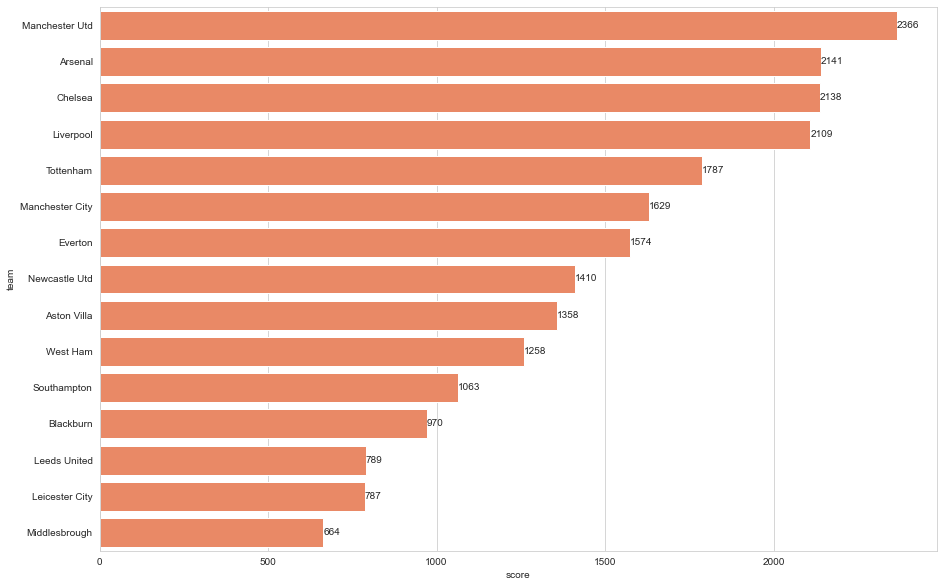

In [36]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='score', y='team',
                 data=team_results.head(15),palette=['#FF7F50'])
ax.bar_label(ax.containers[0]);


In [37]:
df['difference_goal'] = abs(df.HomeGoals-df.AwayGoals)

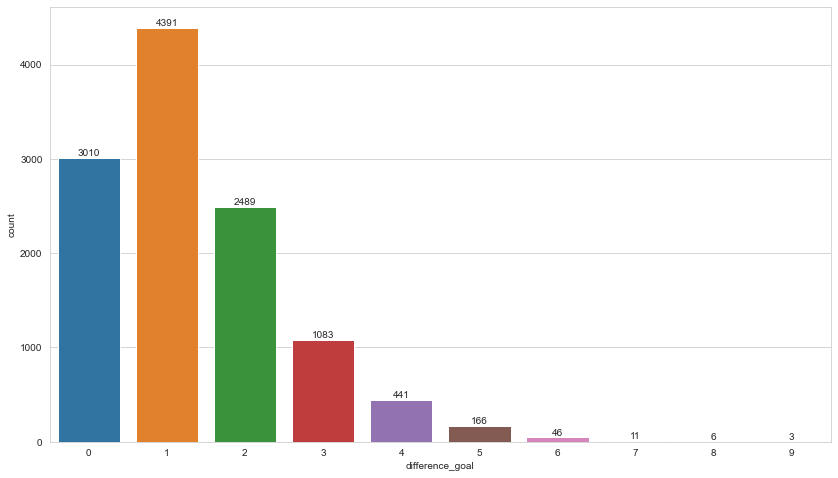

In [38]:
plt.figure(figsize=(14,8))
ax=sns.countplot(data = df , x = 'difference_goal')
ax.bar_label(ax.containers[0]);

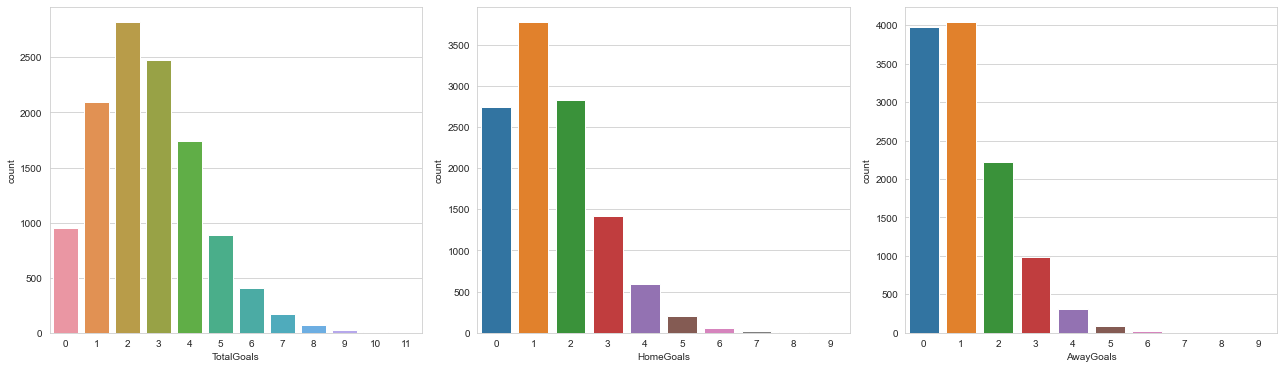

In [39]:
fig, ax = plt.subplots(1,3, figsize=(22,6),sharex=False)

sns.countplot(data = df , x = 'TotalGoals',ax=ax[0])
sns.countplot(data = df , x = 'HomeGoals',ax=ax[1])
sns.countplot(data = df , x = 'AwayGoals', ax=ax[2])

plt.subplots_adjust(hspace = 0.15, wspace=0.15);

In [40]:
df.head()

,Season_End_Year,Date,Home,HomeGoals,AwayGoals,Away,FTR,TotalGoals,difference_goal
0,1993,1992-08-15,Coventry City,2,1,Middlesbrough,H,3,1
1,1993,1992-08-15,Leeds United,2,1,Wimbledon,H,3,1
2,1993,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,3,1
3,1993,1992-08-15,Crystal Palace,3,3,Blackburn,D,6,0
4,1993,1992-08-15,Arsenal,2,4,Norwich City,A,6,2


In [41]:
df["Match_score"] = df["HomeGoals"].astype(str) + "-" + df["AwayGoals"].astype(str)

In [42]:
df.head()

,Season_End_Year,Date,Home,HomeGoals,AwayGoals,Away,FTR,TotalGoals,difference_goal,Match_score
0,1993,1992-08-15,Coventry City,2,1,Middlesbrough,H,3,1,2-1
1,1993,1992-08-15,Leeds United,2,1,Wimbledon,H,3,1,2-1
2,1993,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,3,1,2-1
3,1993,1992-08-15,Crystal Palace,3,3,Blackburn,D,6,0,3-3
4,1993,1992-08-15,Arsenal,2,4,Norwich City,A,6,2,2-4


In [43]:
match_score = df.groupby('Match_score',as_index=False) \
    .agg({'Home':'count'}) \
    .sort_values('Home',ascending=False)

In [44]:
match_score.head()

,Match_score,Home
10,1-1,1348
9,1-0,1231
19,2-1,1012
18,2-0,957
0,0-0,955


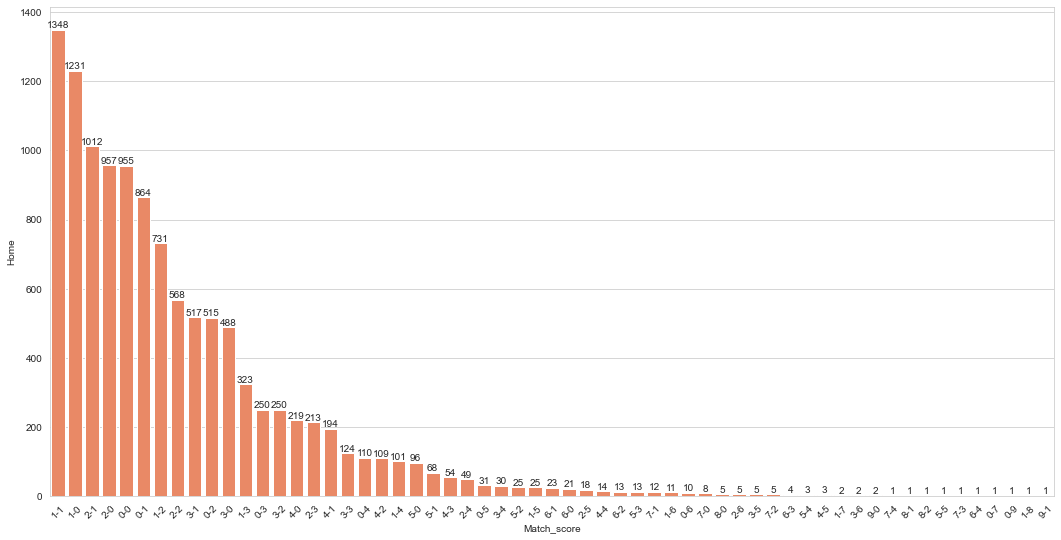

In [45]:
plt.figure(figsize=(18,9))
ax = sns.barplot(x='Match_score', y='Home',
                 data=match_score,palette=['#FF7F50'])
ax.bar_label(ax.containers[0]);
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

In [46]:
df.FTR.value_counts()

H    5335
A    3301
D    3010
Name: FTR, dtype: int64

In [47]:
df.head()

,Season_End_Year,Date,Home,HomeGoals,AwayGoals,Away,FTR,TotalGoals,difference_goal,Match_score
0,1993,1992-08-15,Coventry City,2,1,Middlesbrough,H,3,1,2-1
1,1993,1992-08-15,Leeds United,2,1,Wimbledon,H,3,1,2-1
2,1993,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,3,1,2-1
3,1993,1992-08-15,Crystal Palace,3,3,Blackburn,D,6,0,3-3
4,1993,1992-08-15,Arsenal,2,4,Norwich City,A,6,2,2-4


In [48]:
home_goals = df.groupby('Home')['HomeGoals'] \
    .agg([('sum','sum'),('count','count')]) 

In [49]:
home_goals.head()

,sum,count
Home,,
Arsenal,1154,576
Aston Villa,684,519
Barnsley,25,19
Birmingham City,162,133
Blackburn,545,348


In [50]:
away_goals = df.groupby('Away')['AwayGoals'] \
    .agg([('sum','sum'),('count','count')]) 

In [51]:
away_goals.head()

,sum,count
Away,,
Arsenal,863,576
Aston Villa,581,519
Barnsley,12,19
Birmingham City,111,133
Blackburn,382,348


In [52]:
team_goals = home_goals.merge(away_goals,left_index=True, right_index=True)

In [53]:
team_goals=team_goals.rename(columns={'sum_x':'home_goals','sum_y':'away_goals'})

In [54]:
team_goals['matches'] = team_goals['count_x'] + team_goals['count_y']
team_goals['total_goals'] = team_goals['home_goals'] + team_goals['away_goals']

In [55]:
team_goals = team_goals.drop(columns=['count_x','count_y'])

In [56]:
team_goals = team_goals.reset_index()

In [57]:
team_goals['avg_goals'] = round(team_goals['total_goals'] / team_goals['matches'],2)
team_goals = team_goals[['Home','home_goals','away_goals','total_goals','avg_goals','matches']]

In [58]:
team_goals.head()

,Home,home_goals,away_goals,total_goals,avg_goals,matches
0,Arsenal,1154,863,2017,1.75,1152
1,Aston Villa,684,581,1265,1.22,1038
2,Barnsley,25,12,37,0.97,38
3,Birmingham City,162,111,273,1.03,266
4,Blackburn,545,382,927,1.33,696


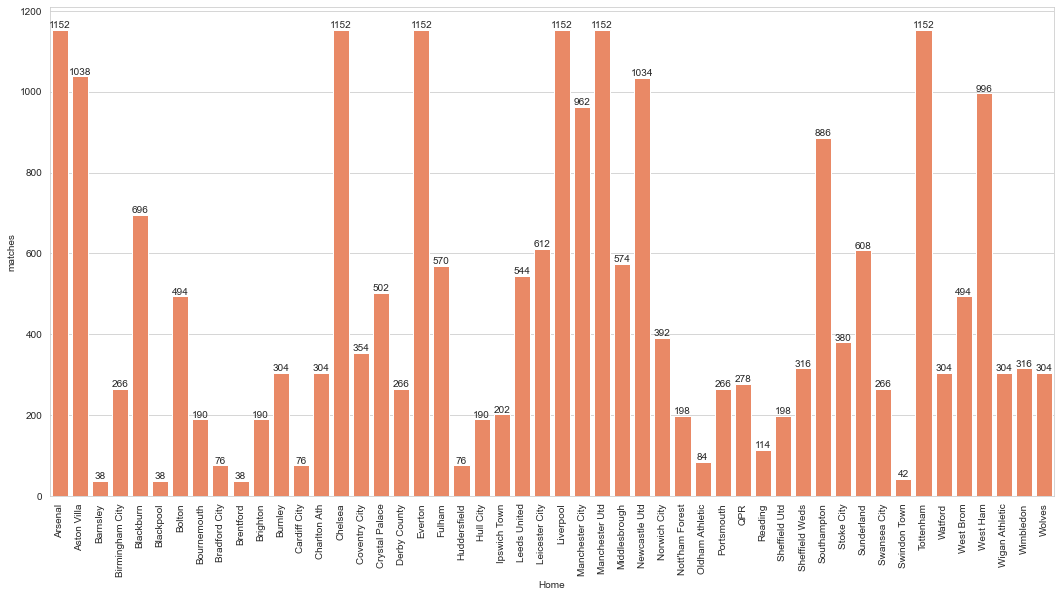

In [59]:
plt.figure(figsize=(18,9))
ax = sns.barplot(x='Home', y='matches',
                 data=team_goals,palette=['#FF7F50'])
ax.bar_label(ax.containers[0]);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

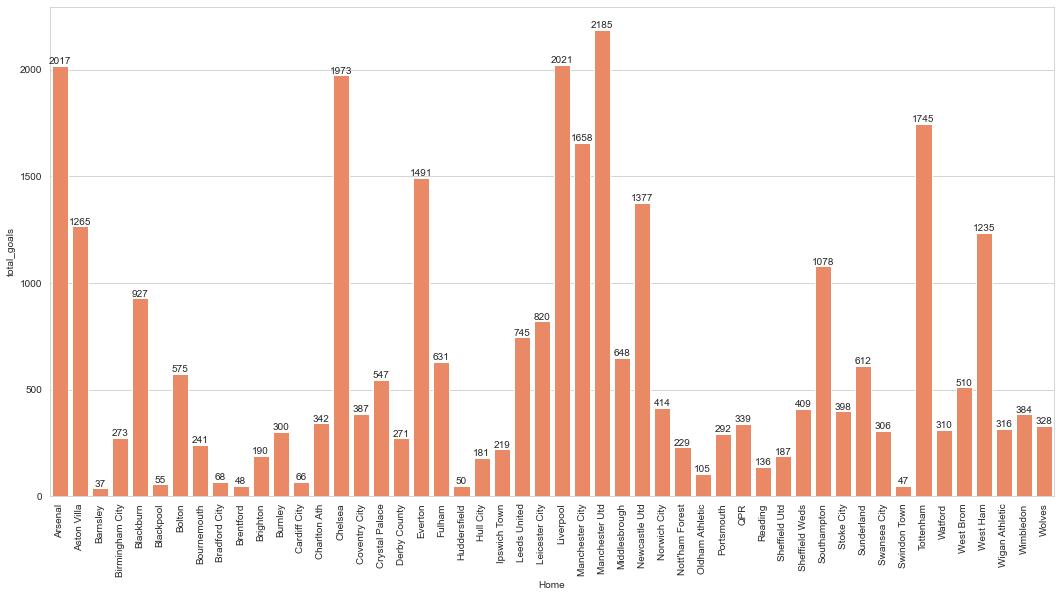

In [60]:
plt.figure(figsize=(18,9))
ax = sns.barplot(x='Home', y='total_goals',
                 data=team_goals,palette=['#FF7F50'])
ax.bar_label(ax.containers[0]);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

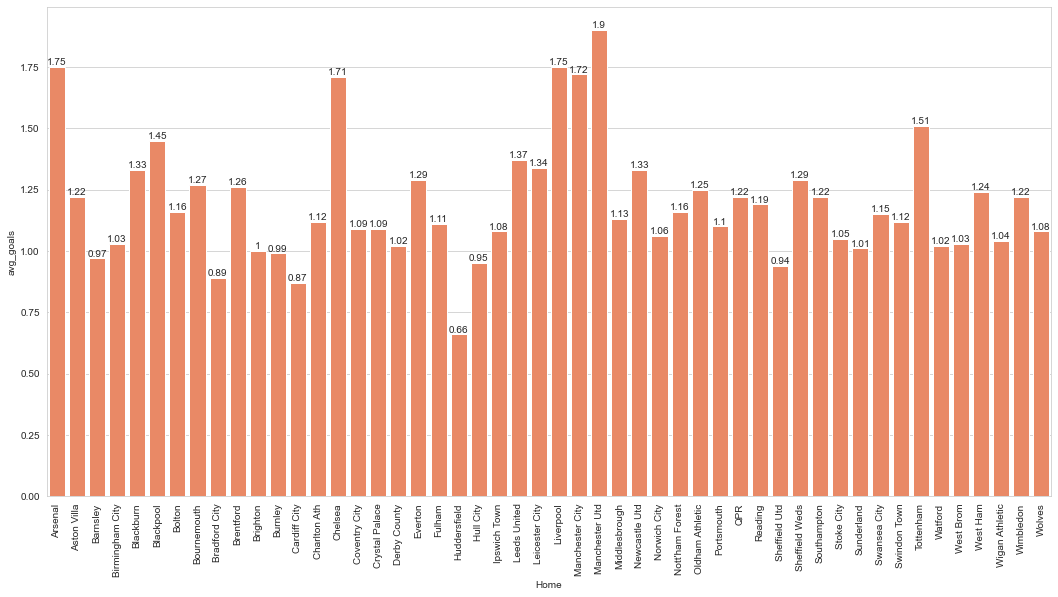

In [61]:
plt.figure(figsize=(18,9))
ax = sns.barplot(x='Home', y='avg_goals',
                 data=team_goals,palette=['#FF7F50'])
ax.bar_label(ax.containers[0]);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

In [62]:
df.head()

,Season_End_Year,Date,Home,HomeGoals,AwayGoals,Away,FTR,TotalGoals,difference_goal,Match_score
0,1993,1992-08-15,Coventry City,2,1,Middlesbrough,H,3,1,2-1
1,1993,1992-08-15,Leeds United,2,1,Wimbledon,H,3,1,2-1
2,1993,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,3,1,2-1
3,1993,1992-08-15,Crystal Palace,3,3,Blackburn,D,6,0,3-3
4,1993,1992-08-15,Arsenal,2,4,Norwich City,A,6,2,2-4


In [63]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [64]:
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [65]:
df.head()

,Season_End_Year,Date,Home,HomeGoals,AwayGoals,Away,FTR,TotalGoals,difference_goal,Match_score,month,day
0,1993,1992-08-15,Coventry City,2,1,Middlesbrough,H,3,1,2-1,8,15
1,1993,1992-08-15,Leeds United,2,1,Wimbledon,H,3,1,2-1,8,15
2,1993,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,3,1,2-1,8,15
3,1993,1992-08-15,Crystal Palace,3,3,Blackburn,D,6,0,3-3,8,15
4,1993,1992-08-15,Arsenal,2,4,Norwich City,A,6,2,2-4,8,15


In [66]:
month_goals=df.groupby('month',as_index=False) \
    .agg({'TotalGoals':'sum'}) \
    .sort_values('TotalGoals',ascending=False)

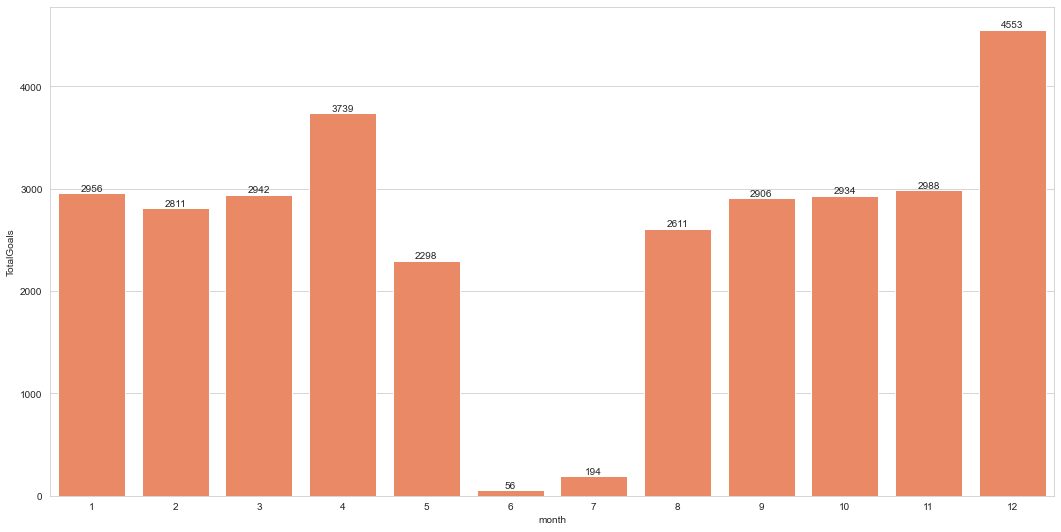

In [67]:
plt.figure(figsize=(18,9))
ax = sns.barplot(x='month', y='TotalGoals',
                 data=month_goals,palette=['#FF7F50'])
ax.bar_label(ax.containers[0]);
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

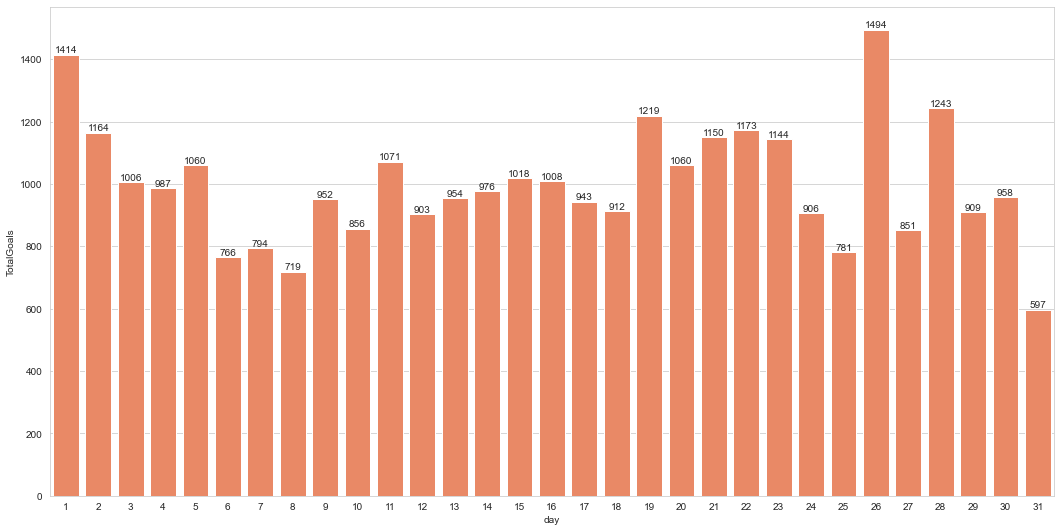

In [68]:
day_goals=df.groupby('day',as_index=False) \
    .agg({'TotalGoals':'sum'}) \
    .sort_values('TotalGoals',ascending=False)

plt.figure(figsize=(18,9))
ax = sns.barplot(x='day', y='TotalGoals',
                 data=day_goals,palette=['#FF7F50'])
ax.bar_label(ax.containers[0]);
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

In [69]:
home_missed = df.groupby('Home')['AwayGoals'] \
    .agg([('sum','sum'),('count','count')]) 

In [70]:
away_missed = df.groupby('Away')['HomeGoals'] \
    .agg([('sum','sum'),('count','count')]) 

In [71]:
team_missed = home_missed.merge(away_missed,left_index=True, right_index=True)

In [72]:
team_missed.head()

,sum_x,count_x,sum_y,count_y
Home,,,,
Arsenal,489,576,659,576
Aston Villa,577,519,776,519
Barnsley,35,19,47,19
Birmingham City,140,133,220,133
Blackburn,381,348,526,348


In [73]:
team_missed['matches'] = team_missed['count_x'] + team_missed['count_y']
team_missed['total_missed'] = team_missed['sum_x'] + team_missed['sum_y']

In [74]:
team_missed.head()

,sum_x,count_x,sum_y,count_y,matches,total_missed
Home,,,,,,
Arsenal,489,576,659,576,1152,1148
Aston Villa,577,519,776,519,1038,1353
Barnsley,35,19,47,19,38,82
Birmingham City,140,133,220,133,266,360
Blackburn,381,348,526,348,696,907


In [75]:
team_missed = team_missed.drop(columns=['count_x','count_y'])
team_missed = team_missed.rename(columns={'sum_x':'home_missed','sum_y':'away_missed'})

In [76]:
team_missed = team_missed[['home_missed','away_missed','total_missed','matches']]

In [77]:
team_missed['avg_missed'] = round(team_missed['total_missed'] / team_missed['matches'],2)

In [78]:
team_missed = team_missed.reset_index()

In [79]:
team_missed.head()

,Home,home_missed,away_missed,total_missed,matches,avg_missed
0,Arsenal,489,659,1148,1152,1.00
1,Aston Villa,577,776,1353,1038,1.30
2,Barnsley,35,47,82,38,2.16
3,Birmingham City,140,220,360,266,1.35
4,Blackburn,381,526,907,696,1.30


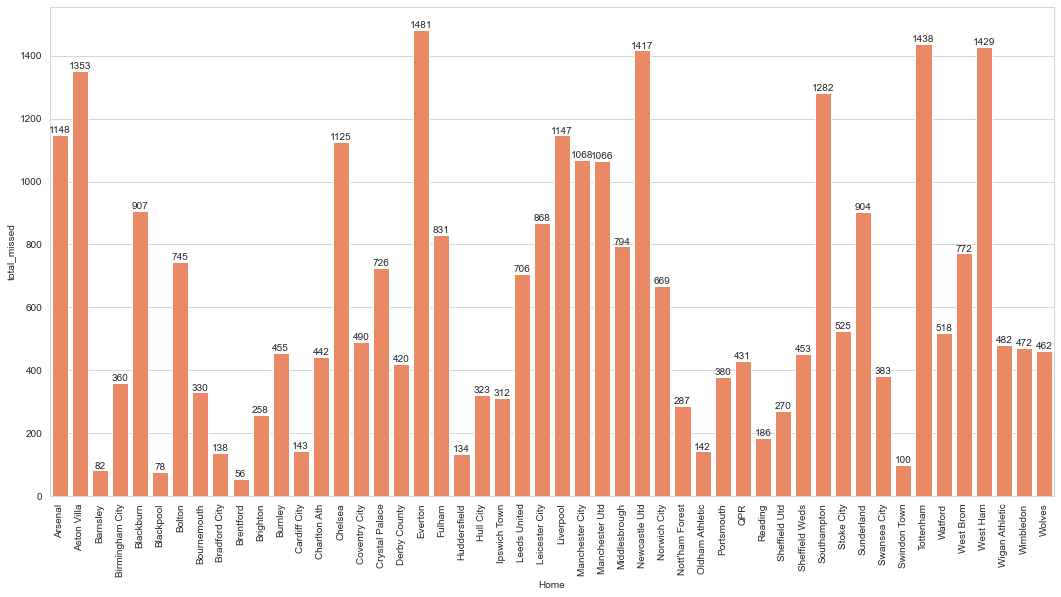

In [80]:
plt.figure(figsize=(18,9))
ax = sns.barplot(x='Home', y='total_missed',
                 data=team_missed,palette=['#FF7F50'])
ax.bar_label(ax.containers[0]);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

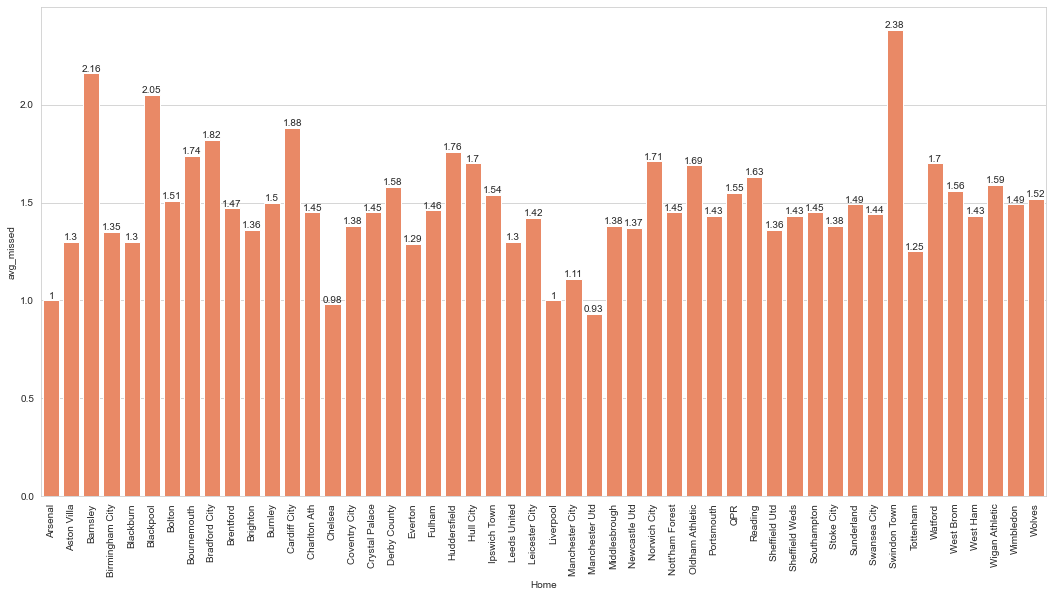

In [81]:
plt.figure(figsize=(18,9))
ax = sns.barplot(x='Home', y='avg_missed',
                 data=team_missed,palette=['#FF7F50'])
ax.bar_label(ax.containers[0]);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

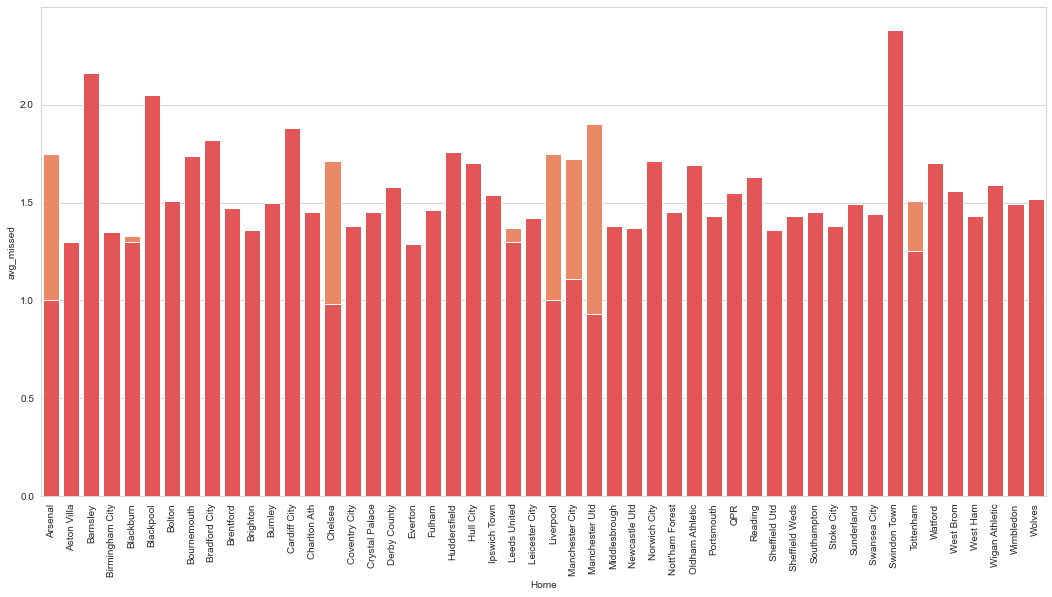

In [82]:
plt.figure(figsize=(18,9))
ax=sns.barplot(x='Home', y='avg_goals',
                 data=team_goals,palette=['#FF7F50'])
ax=sns.barplot(x='Home', y='avg_missed',
                 data=team_missed,palette=['#FA3F40'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

In [83]:
teams = team_goals.merge(team_missed)

In [84]:
teams['avg_difference'] = teams.avg_goals - teams.avg_missed

In [85]:
teams.head()

,Home,home_goals,away_goals,total_goals,avg_goals,matches,home_missed,away_missed,total_missed,avg_missed,avg_difference
0,Arsenal,1154,863,2017,1.75,1152,489,659,1148,1.00,0.75
1,Aston Villa,684,581,1265,1.22,1038,577,776,1353,1.30,-0.08
2,Barnsley,25,12,37,0.97,38,35,47,82,2.16,-1.19
3,Birmingham City,162,111,273,1.03,266,140,220,360,1.35,-0.32
4,Blackburn,545,382,927,1.33,696,381,526,907,1.30,0.03


In [86]:
team_results = team_results.rename(columns={'team':'Home'})

In [87]:
df_teams = teams.merge(team_results)

In [88]:
df_teams=df_teams[['Home','matches','wins','draws','loses','score','home_goals','away_goals','total_goals','avg_goals','home_missed','away_missed','total_missed','avg_missed','avg_difference']]

In [89]:
df_teams.head()

,Home,matches,wins,draws,loses,score,home_goals,away_goals,total_goals,avg_goals,home_missed,away_missed,total_missed,avg_missed,avg_difference
0,Arsenal,1152,619,284,249,2141,1154,863,2017,1.75,489,659,1148,1.00,0.75
1,Aston Villa,1038,354,296,388,1358,684,581,1265,1.22,577,776,1353,1.30,-0.08
2,Barnsley,38,10,5,23,35,25,12,37,0.97,35,47,82,2.16,-1.19
3,Birmingham City,266,73,82,111,301,162,111,273,1.03,140,220,360,1.35,-0.32
4,Blackburn,696,262,184,250,970,545,382,927,1.33,381,526,907,1.30,0.03


In [90]:
df_teams['w_l'] = df_teams.wins - df_teams.loses

In [99]:
df_teams['avg_score'] = round(df_teams.score / df_teams.matches,2)

In [100]:
df_teams.head()

,Home,matches,wins,draws,loses,score,home_goals,away_goals,total_goals,avg_goals,home_missed,away_missed,total_missed,avg_missed,avg_difference,w_l,avg_score
0,Arsenal,1152,619,284,249,2141,1154,863,2017,1.75,489,659,1148,1.00,0.75,370,1.86
1,Aston Villa,1038,354,296,388,1358,684,581,1265,1.22,577,776,1353,1.30,-0.08,-34,1.31
2,Barnsley,38,10,5,23,35,25,12,37,0.97,35,47,82,2.16,-1.19,-13,0.92
3,Birmingham City,266,73,82,111,301,162,111,273,1.03,140,220,360,1.35,-0.32,-38,1.13
4,Blackburn,696,262,184,250,970,545,382,927,1.33,381,526,907,1.30,0.03,12,1.39


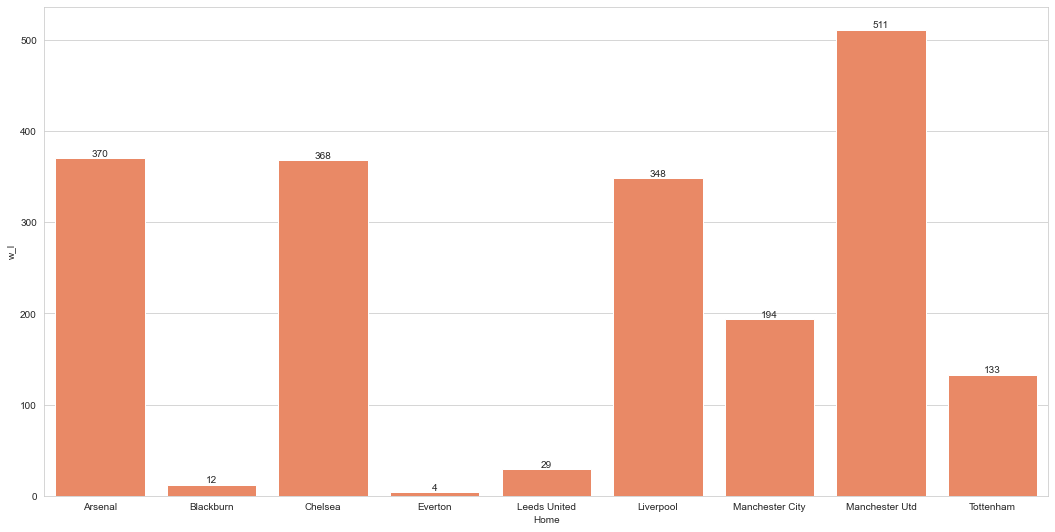

In [92]:
plt.figure(figsize=(18,9))
ax=sns.barplot(x='Home', y='w_l',
                 data=df_teams.query('w_l>=0'),palette=['#FF7F50'])
ax.bar_label(ax.containers[0]);

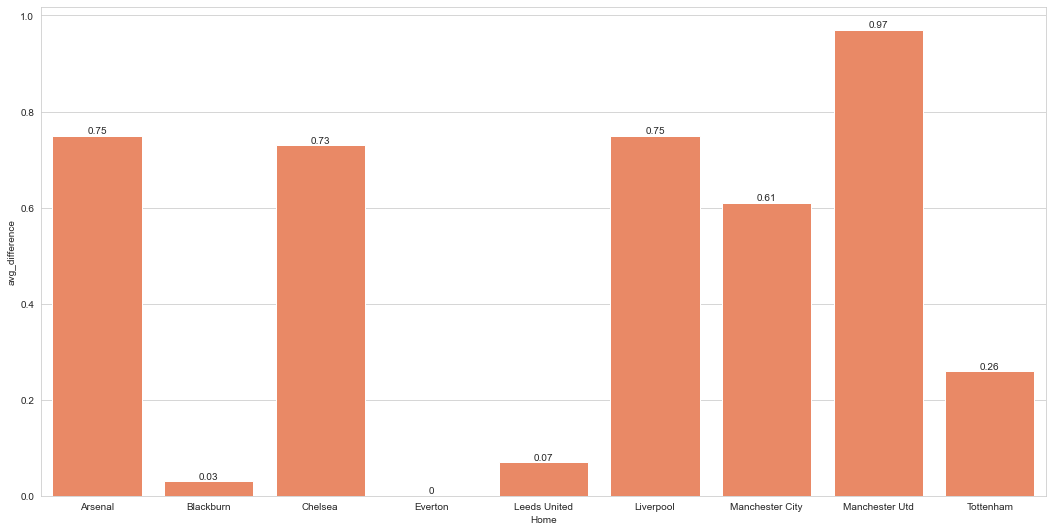

In [93]:
plt.figure(figsize=(18,9))
ax=sns.barplot(x='Home', y='avg_difference',
                 data=df_teams.query('avg_difference>=0'),palette=['#FF7F50'])
ax.bar_label(ax.containers[0]);

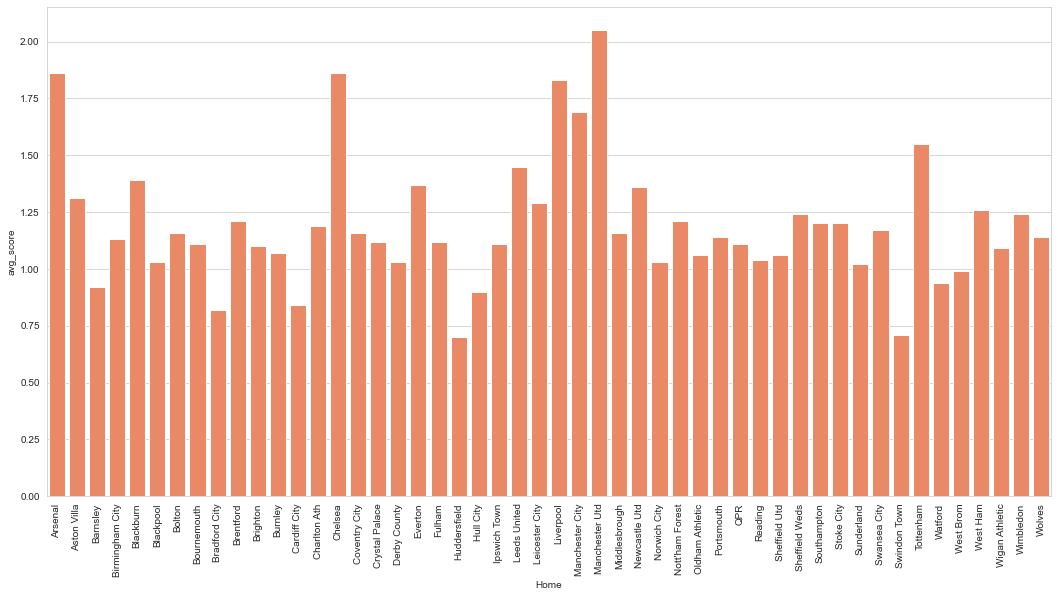

In [103]:
plt.figure(figsize=(18,9))
ax=sns.barplot(x='Home', y='avg_score',
                 data=df_teams,palette=['#FF7F50'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

In [107]:
number_seasons=df.groupby('Home',as_index=False) \
    .agg({'Season_End_Year':'nunique'}) \
    .sort_values('Season_End_Year',ascending=False)

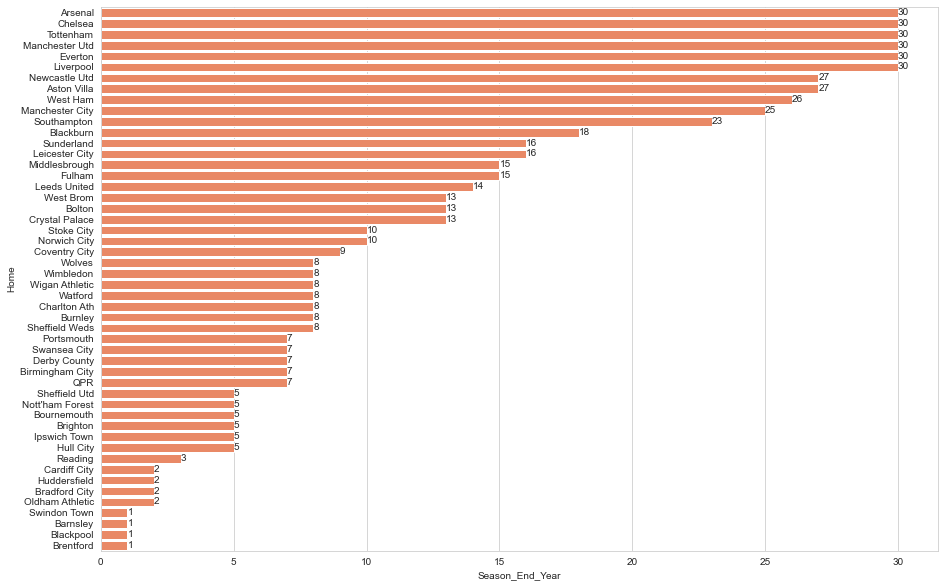

In [108]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='Season_End_Year', y='Home',
                 data=number_seasons,palette=['#FF7F50'])
ax.bar_label(ax.containers[0]);


In [109]:
df.head()

,Season_End_Year,Date,Home,HomeGoals,AwayGoals,Away,FTR,TotalGoals,difference_goal,Match_score,month,day
0,1993,1992-08-15,Coventry City,2,1,Middlesbrough,H,3,1,2-1,8,15
1,1993,1992-08-15,Leeds United,2,1,Wimbledon,H,3,1,2-1,8,15
2,1993,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,3,1,2-1,8,15
3,1993,1992-08-15,Crystal Palace,3,3,Blackburn,D,6,0,3-3,8,15
4,1993,1992-08-15,Arsenal,2,4,Norwich City,A,6,2,2-4,8,15


In [111]:
seasons_sum=df.groupby('Season_End_Year',as_index=False) \
    .agg({'HomeGoals':'sum','AwayGoals':'sum','TotalGoals':'sum','difference_goal':'sum'}) \
    .rename(columns={'HomeGoals':'HomeGoals_sum','AwayGoals':'AwayGoals_sum','difference_goal':'difference_goal_sum'})

In [112]:
seasons_sum.head()

,Season_End_Year,HomeGoals_sum,AwayGoals_sum,TotalGoals,difference_goal_sum
0,1993,723,499,1222,558
1,1994,663,532,1195,559
2,1995,697,498,1195,579
3,1996,580,408,988,484
4,1997,559,411,970,468


In [114]:
seasons_mean=df.groupby('Season_End_Year',as_index=False) \
    .agg({'HomeGoals':'mean','AwayGoals':'mean','TotalGoals':'mean','difference_goal':'mean'}) \
    .rename(columns={'HomeGoals':'HomeGoals_mean','AwayGoals':'AwayGoals_mean', 'TotalGoals':'TotalGoals_mean','difference_goal':'difference_goal_mean'})

In [117]:
seasons_mean = seasons_mean.round(2)

In [118]:
seasons_mean.head()

,Season_End_Year,HomeGoals_mean,AwayGoals_mean,TotalGoals_mean,difference_goal_mean
0,1993,1.56,1.08,2.65,1.21
1,1994,1.44,1.15,2.59,1.21
2,1995,1.51,1.08,2.59,1.25
3,1996,1.53,1.07,2.60,1.27
4,1997,1.47,1.08,2.55,1.23


In [123]:
seasons_overall=seasons_sum.merge(seasons_mean)

In [124]:
seasons_overall.head()

,Season_End_Year,HomeGoals_sum,AwayGoals_sum,TotalGoals,difference_goal_sum,HomeGoals_mean,AwayGoals_mean,TotalGoals_mean,difference_goal_mean
0,1993,723,499,1222,558,1.56,1.08,2.65,1.21
1,1994,663,532,1195,559,1.44,1.15,2.59,1.21
2,1995,697,498,1195,579,1.51,1.08,2.59,1.25
3,1996,580,408,988,484,1.53,1.07,2.60,1.27
4,1997,559,411,970,468,1.47,1.08,2.55,1.23


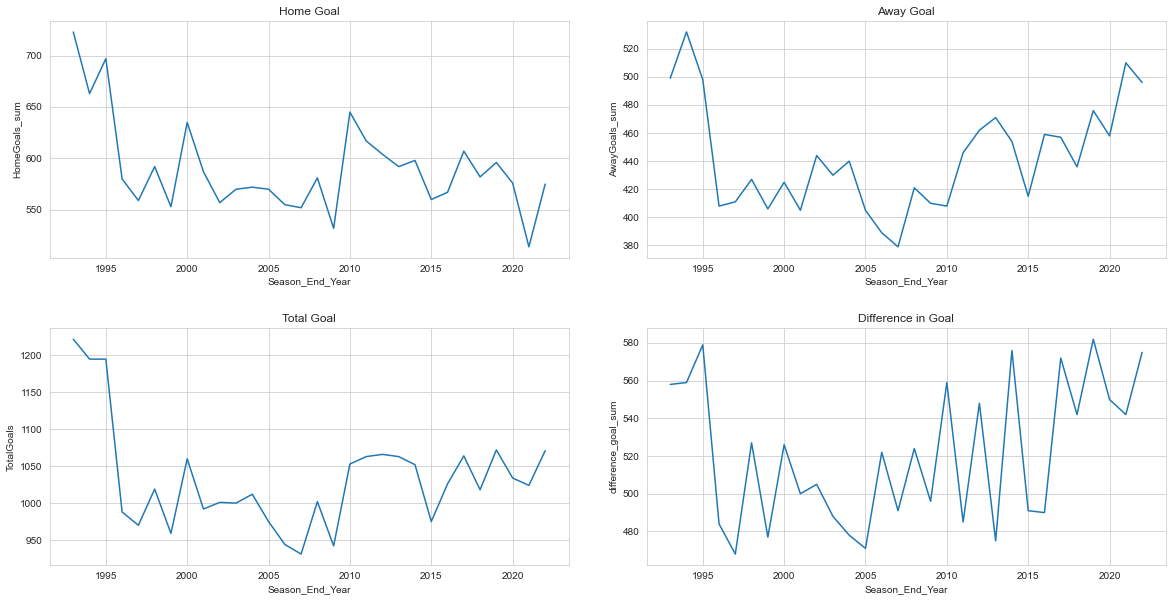

In [157]:
fig, ax = plt.subplots(2,2, figsize=(20,10),sharex=False)

sns.lineplot(data=seasons_overall, x="Season_End_Year", y='HomeGoals_sum', ax=ax[0,0]).set(title='Home Goal')
sns.lineplot(data=seasons_overall, x="Season_End_Year", y='AwayGoals_sum', ax=ax[0,1]).set(title='Away Goal')
sns.lineplot(data=seasons_overall, x="Season_End_Year", y='TotalGoals', ax=ax[1,0]).set(title='Total Goal')
sns.lineplot(data=seasons_overall, x="Season_End_Year", y='difference_goal_sum', ax=ax[1,1]).set(title='Difference in Goal')

plt.subplots_adjust(hspace = 0.3, wspace=0.15);


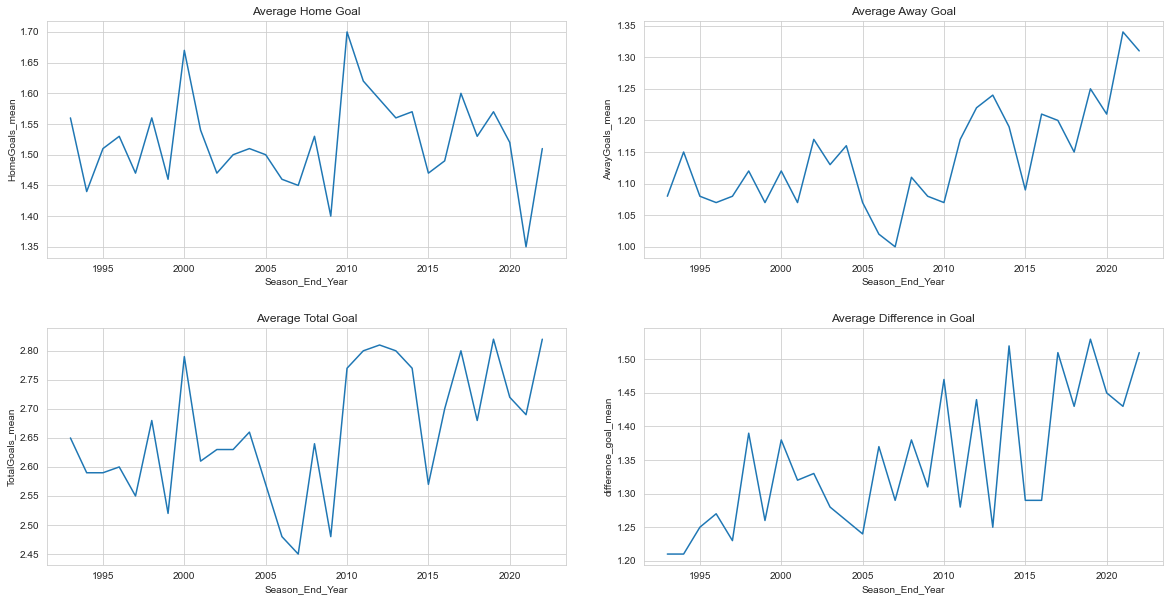

In [155]:
fig, ax = plt.subplots(2,2, figsize=(20,10),sharex=False)

sns.lineplot(data=seasons_overall, x="Season_End_Year", y='HomeGoals_mean', ax=ax[0,0]).set(title='Average Home Goal')
sns.lineplot(data=seasons_overall, x="Season_End_Year", y='AwayGoals_mean', ax=ax[0,1]).set(title='Average Away Goal')
sns.lineplot(data=seasons_overall, x="Season_End_Year", y='TotalGoals_mean', ax=ax[1,0]).set(title='Average Total Goal')
sns.lineplot(data=seasons_overall, x="Season_End_Year", y='difference_goal_mean', ax=ax[1,1]).set(title='Average Difference in Goal')

plt.subplots_adjust(hspace = 0.3, wspace=0.15);

In [158]:
df_teams.head()

,Home,matches,wins,draws,loses,score,home_goals,away_goals,total_goals,avg_goals,home_missed,away_missed,total_missed,avg_missed,avg_difference,w_l,avg_score
0,Arsenal,1152,619,284,249,2141,1154,863,2017,1.75,489,659,1148,1.00,0.75,370,1.86
1,Aston Villa,1038,354,296,388,1358,684,581,1265,1.22,577,776,1353,1.30,-0.08,-34,1.31
2,Barnsley,38,10,5,23,35,25,12,37,0.97,35,47,82,2.16,-1.19,-13,0.92
3,Birmingham City,266,73,82,111,301,162,111,273,1.03,140,220,360,1.35,-0.32,-38,1.13
4,Blackburn,696,262,184,250,970,545,382,927,1.33,381,526,907,1.30,0.03,12,1.39


<AxesSubplot:xlabel='total_goals', ylabel='score'>

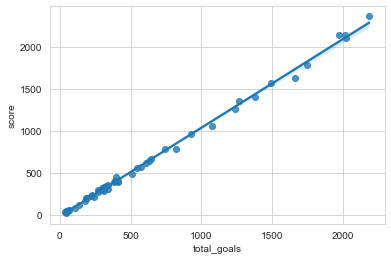

In [159]:
sns.regplot(x='total_goals', y='score', data = df_teams)

<AxesSubplot:xlabel='avg_goals', ylabel='avg_difference'>

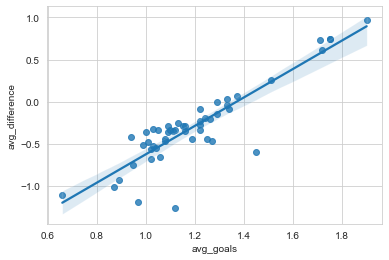

In [161]:
sns.regplot(x='avg_goals', y='avg_difference', data = df_teams)